# GABLS stable ABL case
## Nalu-Wind 3.125m resolution, 1-eqn ksgs

Comparison with GABLS data

**Note**: To convert this notebook to PDF, use the command
```bash
$ jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_input"}' --to pdf postpro_gabls.ipynb
```

In [1]:
%%capture
# Important header information
naluhelperdir = '../../utilities/'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
import plotABLstats
import gabls
import yaml as yaml
from IPython.display import Image
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def loadNaluWind(rundir, vtxtfile, ttxtfile, ncfile='', avgtimes=[], usencfile=True, savefile=True):
    """
    Function to automatically load the velocity and temperature profile
    
    rundir       string with location where run files are located
    vtxtfile     text file with previously saved velocity profiles
    ttxtfile     text file with previously saved temperature profiles
    ncfile       netcdf file with ABL statistics (usually 'abl_statistics.nc')
    avgtimes     list with times [t1, t2] to average over (applicable when using netcdf file)
    usencfile    boolean: if True, read the netcdf file, if False, use the previously saved text files
    savefile     boolean: if True, save the data from the netcdf file to text files
    """
    if usencfile:
        # Load the data from the netcdf file
        data              = plotABLstats.ABLStatsFileClass(stats_file=rundir+'/'+ncfile);
        Vprof, vheader    = plotABLstats.plotvelocityprofile(data, None, tlims=avgtimes, exportdata=True)
        Tprof, theader    = plotABLstats.plottemperatureprofile(data, None, tlims=avgtimes, exportdata=True)
        if savefile:
            # Export the Nalu-Wind data for other people to compare
            np.savetxt(vtxtfile, Vprof, header=vheader)
            np.savetxt(ttxtfile, Tprof, header=theader) 
    else:
        # Load the data from pre-computed text files
        Vprof             = np.loadtxt(rundir+'/'+vtxtfile)  # Velocity profile
        Tprof             = np.loadtxt(rundir+'/'+ttxtfile)  # Temperature profile
    return Vprof, Tprof

In [3]:
# Nalu-wind parameters
rundir    = '/ascldap/users/lcheung/GPFS1/2020/amrcodes/testruns/gabls.run03'
statsfile = 'abl_statistics.nc'
avgtimes  = [3600*8,3600*9]

In [4]:
# Load nalu-wind data
#Vprof, Tprof = loadNaluWind(rundir, 'NaluWind_GABLS_velocity.dat', 'NaluWind_GABLS_temperature.dat', avgtimes=avgtimes, ncfile=statsfile, usencfile=True, savefile=True)
# Use this command to load from previous text files
Vprof, Tprof = loadNaluWind('./', 'NaluWind_GABLS_velocity.dat', 'NaluWind_GABLS_temperature.dat', ncfile=statsfile, avgtimes=avgtimes, usencfile=False, savefile=False)

In [5]:
# Pedersen parameters
datadir   = '../gabls_data/'#'/projects/wind_uq/lcheung/HFMQ3compare/gabls_data' 
gablsfiles = [['/res_3.125m/LLNL/LLNL_A9_128.dat', 'LLNL'],
             ['/res_3.125m/CSU/CSU_A9_128.dat',    'CSU'],
             ['/res_3.125m/NCAR/NCAR_A9_128.dat',  'NCAR'],
             ['/res_3.125m/NERSC/NERSC_A9_128.dat','NERSC'],
             ]

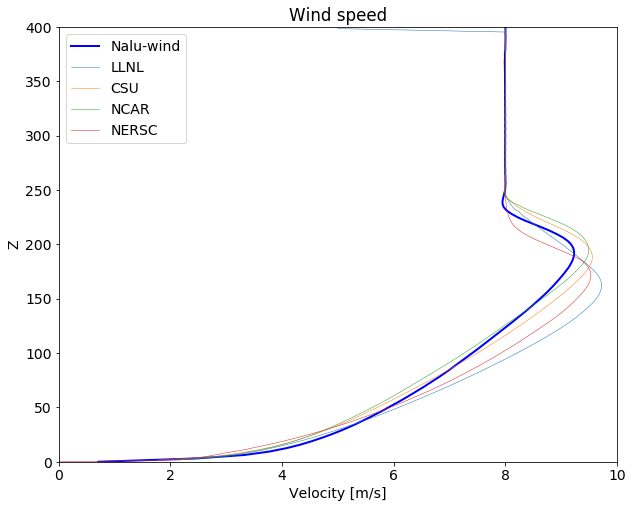

In [6]:
# Plot the velocity profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

# Plot the Nalu-Wind data
plt.plot(np.sqrt(Vprof[:,1]**2 + Vprof[:,2]**2), Vprof[:,0], 'b', lw=2, label='Nalu-wind')

# Plot gabls files
for gablfile in gablsfiles:
    gabls.plotvel(datadir+'/'+gablfile[0], lw=0.5, label=gablfile[1])

# Construct a legend
plt.legend()
plt.ylim([0, 400]);
plt.xlim([0, 10])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z')
#plt.grid()
plt.title('Wind speed')

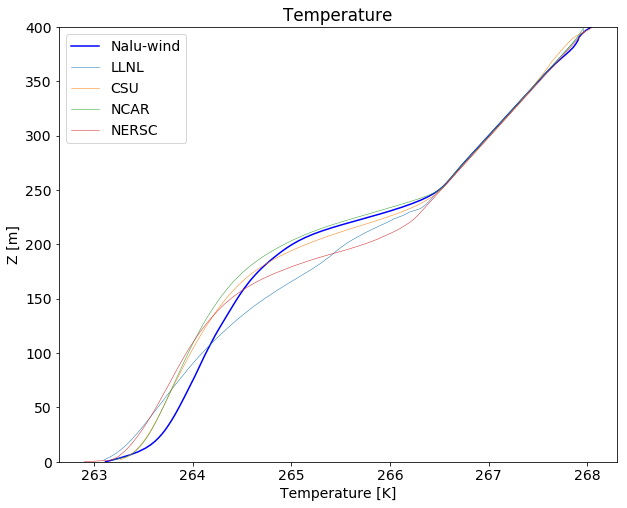

In [7]:
# Plot the temperature profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

# Plot the Nalu-Wind data
plt.plot(Tprof[:,1], Tprof[:,0], 'b', label='Nalu-wind')

# Plot all of the gabls files
for gablfile in gablsfiles:
    gabls.plotcols(datadir+'/'+gablfile[0], xcol=3, ycol=0, lw=0.5, label=gablfile[1])    

# Construct a legend
plt.legend()
plt.ylim([0, 400]);
#plt.xlim([0, 12])
plt.xlabel('Temperature [K]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('Temperature')

In [8]:
# Extract Utau
#utau, utheader    = plotABLstats.plotutauhistory(data, None, tlims=avgtimes, exportdata=True)
#print('Avg Utau = %f'%np.mean(utau[:,1]))

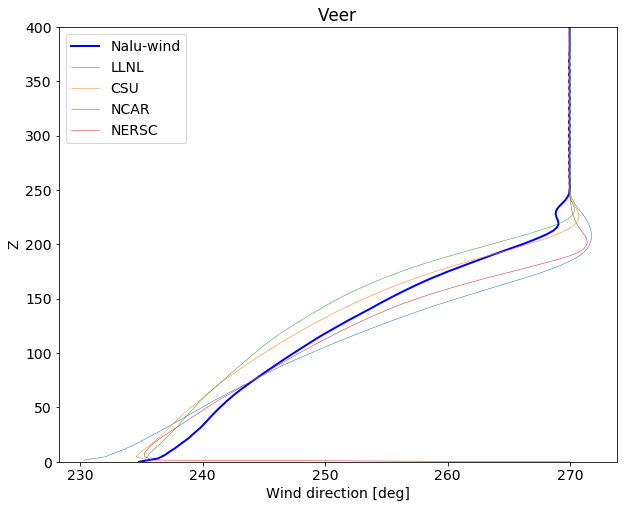

In [9]:
# Plot the veer profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)
import math
# Plot the Nalu-Wind data
veer=270-np.arctan2(Vprof[:,2], Vprof[:,1])*180.0/math.pi
plt.plot(veer, Vprof[:,0], 'b', lw=2, label='Nalu-wind')

# Plot gabls files
for gablfile in gablsfiles:
    dat = gabls.readdata(datadir+'/'+gablfile[0])
    veer=270-np.arctan2(dat[:,2], dat[:,1])*180.0/math.pi
    plt.plot(veer, dat[:,0], '-', lw='0.5',label=gablfile[1])

# Construct a legend
plt.legend()
plt.ylim([0, 400]);
plt.xlabel('Wind direction [deg]')
plt.ylabel('Z')
plt.title('Veer')